<a href="https://colab.research.google.com/github/enjoyPG/SelfMachinelearning/blob/main/%ED%98%BC%EA%B3%B5_%EC%B1%95%ED%84%B03_1(K_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3-1
####핵심 패키지
회귀는 분류와 다르게 기존 데이터를 바탕으로 어떤 특정한 값을 예측하는 방법이다.
K최근접 이웃은 근처 데이터들의 평균으로 예측한다.

이번 문제에서는 농어의 길이를 가지고 무게를 예측해보자.

중요! 데이터의 형식이 달라진다. feature가 2개에서 1개로 줄어든다.(길이가 특성, 무게가 타겟)


In [ ]:
#데이터 준비
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
import matplotlib.pyplot as plt

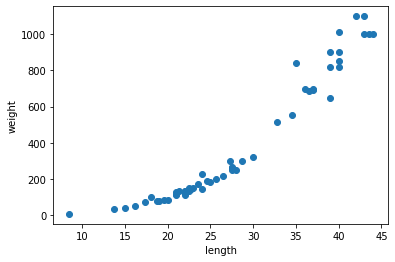

In [ ]:
#농어의 길이가 커짐에 따라 무게도 늘어나는 것을 알 수 있다.
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [ ]:
#크기에 -1로 지정하면 나머지 원소 개수를 모두 채우라는 의미
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
#1차원 리스트에서 1개씩 원소로가지는 2차원 배열로 바뀜
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정 계수 ($ R^2$)
###**대표적인 회귀 문제의 성능측정 도구, 1에 가까울수록 좋고 0에 가깝다면 성능 나쁨**

###분류 문제는 정답을 맞힌 비율을 쉽게 구할 수 있지만 회귀에서는 정확한 숫자를 맞춘다는 것은 사실상 불가능하다. 그래서 예측한 값과 원래 값이 얼마나 큰 차이가 있는지 알기 위해 결정 계수 $ R^2$를 사용한다.
***
###$ R^2$을 이해하기 위해 3가지에 대한 이해가 필요하다.
#### 1. SST or TSS(Sum of Squares Total)-관측값(실제y값)과 관측값 평균 차를 제곱한 총합

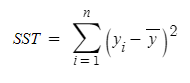

#### 2. SSE or ESS(Explained Sum of Squares)-예상값과 평균의 차를 제곱한 총합
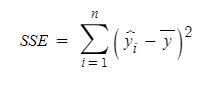

#### 3. SSR or RSS(Residual Sum of Squares)-관측값(원래 Y값)에서 예상값을 뺀(잔차) 값의 제곱의 총합
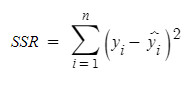

#### 그림으로 표현하면
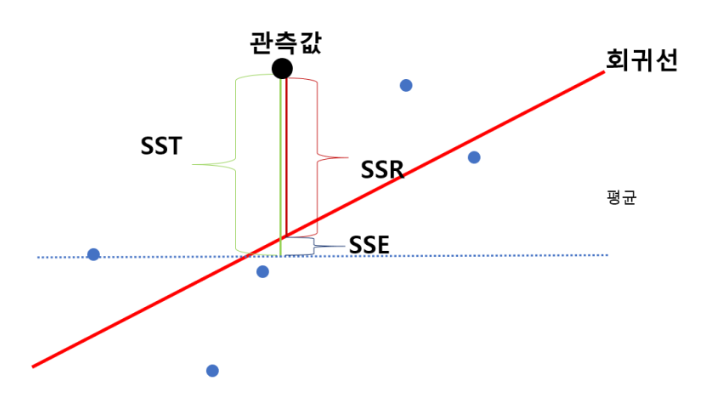


***
###**결정계수 한글 식**
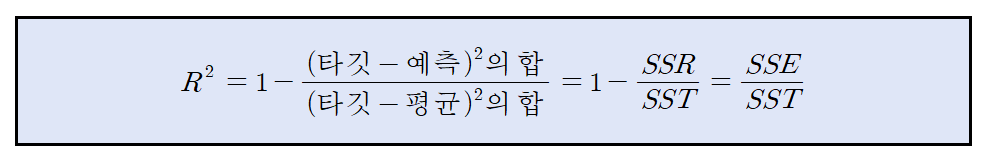

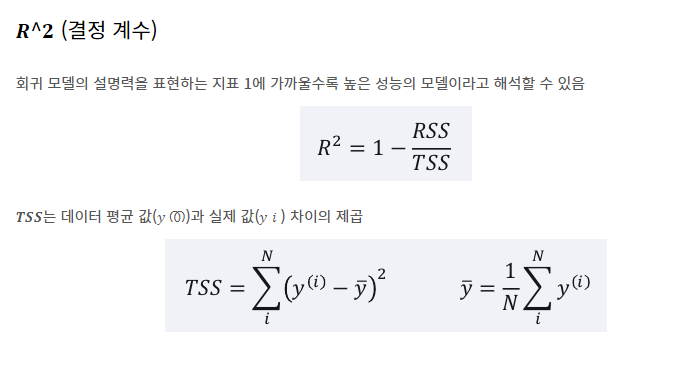

***

###$ R^2$(결정 계수)의 특징
####1. 오차가 없을수록 1에 가까운 값을 가짐(실제값과 예측값의 차이가 적을 수록 RSS가 0에 수렴하면 결국 $ R^2$은 1에 가까운 값을 가지게 되므로)
####2. 값이 0인 경우 데이터의 평균을 의미하는 직선 모델임
####3. 음수 값이 나온 경우 평균값 예측 보다 성능이 좋지 않음 그냥 평균쓰는게..

***
###Scikit_Learn에서는 score() 메서드를 통해 바로 결정계수를 구할 수 있다.

## 다른 측정 도구들..
###1. RSS (위에서 다룸)
###2. MSE (Mean Squared Error) - 평균 제곱 오차, 작을수록 성능이 좋다.
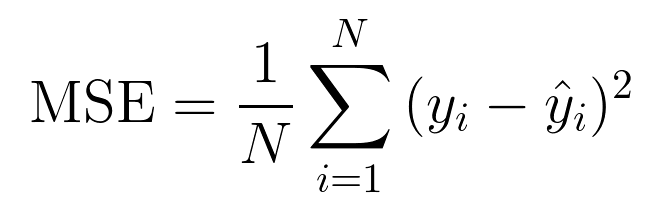
###3. MAE(Mean Absolute Error) - 평균 절댓값 오차
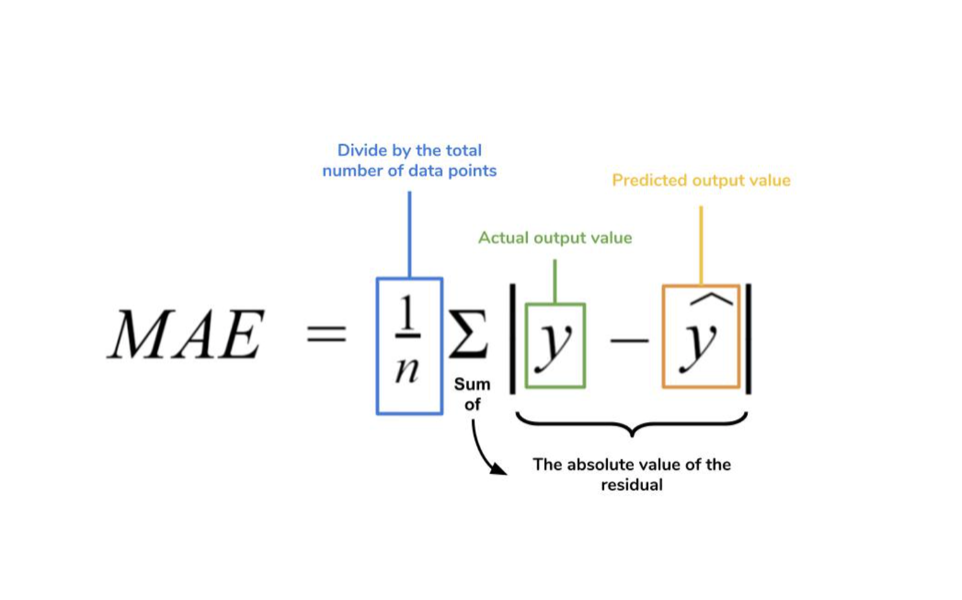
###등등

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
knr.score(test_input, test_target)

0.992809406101064

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합 vs 과소적합
###**1. 과대적합**: 모델이 훈련 세트에 너무 집착해서 데이터에 내재된 거시적 패턴을 감지하지 못함
####**[과대 적합의 발생 원인은 다양]**
- 데이터 세트 내 데이터가 충분하지 못한 경우
- 데이터 세트 내 분산이 크거나 노이즈가 심한 경우
- 모델의 복잡도가 큰 경우
- 과도하게 큰 epoch로 학습하는 경우

####**[해결 방법]**
- 가장 주된 원인은 데이터 세트가 충분히 크지 않은 경우입니다. 이런 경우 훈련 세트에 데이터를 추가하여 과대 적합을 줄일 수 있습니다.
- 더 이상의 데이터 확보가 어려울 경우 가중치를 제한하는 규제(Regularization)를 적용하여 모델의 복잡도를 낮추어 과대 적합을 완화하는 방법도 있습니다.
- 데이터 세트 내 데이터의 분산이 크거나 노이즈가 심한 경우 데이터를 전처리(preprocessing)하여 훈련에 적합한 데이터 세트로 바꿔줍니다.
- 또한 모델의 학습 곡선(learning curve)을 보고 적당한 epoch를 찾아내어 그 epoch까지만 훈련을 하도록 하는 방법도 존재합니다. 이를 조기종료(early-stopping)이라고 합니다.

###**2. 과소적합**: 과소적합은 모델이 너무 단순할 때 발생하는데, 이는 훈련 시간이나 입력 특성이 더 필요하거나 정규화가 덜 필요한 모델로 인해 발생할 수 있습니다.
####**[과소 적합의 발생 원인은 다양]**
- 모델의 복잡도가 낮은 경우
- 모델에 너무 많은 규제가 적용된 경우
- 충분하지 못한 epoch로 학습하는 경우

####**[해결 방법]**
- 모델의 복잡도가 낮은 경우 조금 더 복잡한 모델을 적용하여 훈련 세트의 규칙을 잘 찾아내도록 해줍니다.
- 모델에 너무 많은 규제가 걸린 경우 규제를 줄입니다.
- 더 많은 epoch를 통해 모델이 충분히 학습을 하여 훈련 세트의 규칙을 찾을 수 있도록 해줍니다.

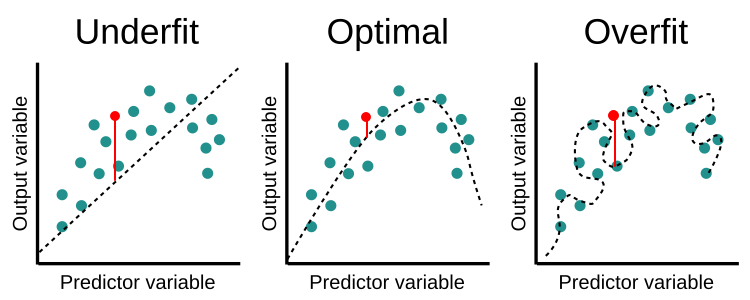

In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [ ]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))

0.9746459963987609


## 확인문제

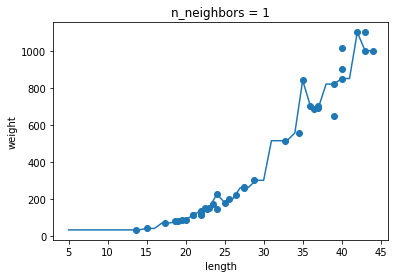

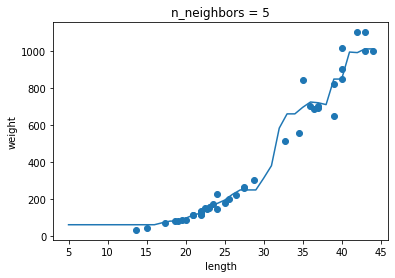

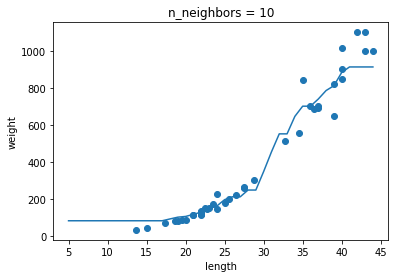

In [ ]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()